<a href="www.linkedin.com/in/AyhamMhd">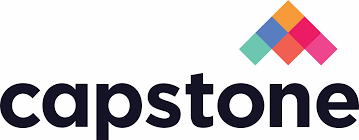</a>

<h1 align=center><font size = 5> Coursera Capstone</font></h1>

#### Please note that all assignment files are in one file separated by markdowns

# Part1 Preparing Data 


### First importing prereqisites 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib.request

# Install bs4 to import BeautifulSoup
!conda install -c conda-forge bs4 --yes

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
print('Done...')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge
    bs4-4.9.1                  |                0           4 KB  conda-forge
    soupsieve-2.0.1            |   py36h9f0ad1d_0          56 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         223 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.1-py36h9f0ad1d_0
  bs4                conda-forge/noarch::bs4-4.9.1-0
  soupsieve          conda-forge/linux-64::soupsieve-2.0.1-py36h9f0ad1d_0



beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
bs4-4.9.1 

### I will use BeautifulSoup to scrap data from html page

In [2]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "html.parser")
all_tables=soup.find_all("table")
all_tables

In [3]:
#We Want to find our right table which is wikitable sortable
right_table=soup.find('table', class_='wikitable sortable')
right_table

In [4]:
#Loop through the rows.

postalcode  =[]
borough     =[]
neighborhood=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        postalcode.append(cells[0].find(text=True))
        borough.append(cells[1].find(text=True))
        neighborhood.append(cells[2].find(text=True))
print('Table filled...')

Table filled...


In [5]:
#Convert to Pandas

df=pd.DataFrame(postalcode,columns=['PostalCode'])
df['Borough']=borough
df['Neighborhood']=neighborhood
df.head()

,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


In [6]:
# We noticed \n that we have to delete
df = df.replace('\\n','', regex=True) 
df.head()


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [7]:
# we have to Ignore cells with a borough that is Not assigned.
df = df.loc[df['Borough'] != 'Not assigned'] 
#df.reset_index(inplace = True, drop=True)
df.head()


,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
#Number of rows 
print('There are {} rows in dataframe '.format(df.shape[0]))

There are 103 rows in dataframe 


### That was Part1 of the Assignment, Thanks a lot!

Notebook created by: <a href = "www.linkedin.com/in/AyhamMhd">Ayham Mhd</a>

# Let us start Part2!

### Getting the latitude and the longitude coordinates of each neighborhood.


In [9]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
!conda install -c conda-forge geocoder --yes
import geocoder
print('Done...')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [10]:
# Preparing the new columns

df['latitude']=''
df['longitude']='' 



In [11]:
geolocator = Nominatim(user_agent="foursquare_agent")
for index, r in df.iterrows():
    location = geolocator.geocode(r['Neighborhood'])
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        r['latitude'] =latitude 
        r['longitude']=longitude


In [12]:
df.head()


,PostalCode,Borough,Neighborhood,latitude,longitude
2,M3A,North York,Parkwoods,37.8568,-122.221
3,M4A,North York,Victoria Village,43.7327,-79.3112
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6408,-79.3799
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7228,-79.4509
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",,


#### I Noticed that there were rows with no LAT_LONG, because of quotation marks in their names
##### so I decided to split them and return the values back.

In [13]:
df1 = df.loc[df['latitude'] =='' ]
print('There are {} rows in the dataset, {} of which have no LONG_LAT'.format(df.shape[0], df1.shape[0]))
df1.head(35)

There are 103 rows in the dataset, 35 of which have no LONG_LAT


,PostalCode,Borough,Neighborhood,latitude,longitude
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",,
17,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",,
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",,
26,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",,
47,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",,
49,M5H,Downtown Toronto,"Richmond, Adelaide, King",,
57,M4J,East York,"East Toronto, Broadview North (Old East York)",,
58,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",,
63,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",,
68,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",,


In [14]:
#Split
df2= df1.drop('Neighborhood', axis=1).join(df1['Neighborhood'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Neighborhood'))
df2.head()


,PostalCode,Borough,latitude,longitude,Neighborhood
6,M7A,Downtown Toronto,,,Queen's Park
6,M7A,Downtown Toronto,,,Ontario Provincial Government
17,M9B,Etobicoke,,,West Deane Park
17,M9B,Etobicoke,,,Princess Gardens
17,M9B,Etobicoke,,,Martin Grove


In [15]:
geolocator = Nominatim(user_agent="foursquare_agent")
for index, r in df2.iterrows():
    location = geolocator.geocode(r['Neighborhood'])
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        r['latitude'] =latitude 
        r['longitude']=longitude
df2.head()

,PostalCode,Borough,latitude,longitude,Neighborhood
6,M7A,Downtown Toronto,43.6597,-79.3903,Queen's Park
6,M7A,Downtown Toronto,46.4291,-80.9521,Ontario Provincial Government
17,M9B,Etobicoke,43.6632,-79.5686,West Deane Park
17,M9B,Etobicoke,51.5998,0.690131,Princess Gardens
17,M9B,Etobicoke,51.4021,-0.202874,Martin Grove


In [16]:
df3=df2.loc[df2['latitude']!='']
df3.head()

,PostalCode,Borough,latitude,longitude,Neighborhood
6,M7A,Downtown Toronto,43.6597,-79.3903,Queen's Park
6,M7A,Downtown Toronto,46.4291,-80.9521,Ontario Provincial Government
17,M9B,Etobicoke,43.6632,-79.5686,West Deane Park
17,M9B,Etobicoke,51.5998,0.690131,Princess Gardens
17,M9B,Etobicoke,51.4021,-0.202874,Martin Grove


#### I found that Neighbourhoos in same PostalCode may have different LON_LAT
##### So better to have the average

In [17]:
df3.dtypes

PostalCode      object
Borough         object
latitude        object
longitude       object
Neighborhood    object
dtype: object

In [18]:
#Convert to decimal
df3['latitude']= pd.to_numeric(df3['latitude'])
df3['longitude']= pd.to_numeric(df3['longitude'])
df3.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PostalCode       object
Borough          object
latitude        float64
longitude       float64
Neighborhood     object
dtype: object

In [19]:
df4=df3.groupby(['PostalCode']).mean()
df4.head()

,latitude,longitude
PostalCode,,
M1C,42.300951,-80.922146
M1K,46.448475,-55.667675
M1L,43.727785,-93.681116
M1M,43.725583,-79.232008
M1N,48.778603,-40.513006


In [20]:
df5 = df
df4.reset_index(inplace=True)

####  Now I have to return these values back to df 

In [21]:

for index, row in df4.iterrows():
    x=row['PostalCode']
    df5.loc[df5['PostalCode']==x,'longitude']=row['longitude']
    df5.loc[df5['PostalCode']==x,'latitude']=row['latitude']
    #df5['longitude'] = row['longitude']
    #df5['latitude']  = row['latitude']
df5.head()    

,PostalCode,Borough,Neighborhood,latitude,longitude
2,M3A,North York,Parkwoods,37.8568,-122.221
3,M4A,North York,Victoria Village,43.7327,-79.3112
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6408,-79.3799
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7228,-79.4509
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",45.0444,-80.1712


### In spite of that, i'll explore the dataset that has the locations


In [22]:
!wget -O Geospatial_data.csv http://cocl.us/Geospatial_data
gdf = pd.read_csv("Geospatial_data.csv")
gdf.head()

--2020-07-19 23:51:33--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 158.85.108.83, 169.48.113.194, 158.85.108.86
Connecting to cocl.us (cocl.us)|158.85.108.83|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-07-19 23:51:33--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|158.85.108.83|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-07-19 23:51:35--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-07-19 23:51:36--  https://ibm.box.com/public

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [23]:
df6=df5

for index, row in gdf.iterrows():
    x=row['Postal Code']
    df6.loc[df6['PostalCode']==x,'longitude']=row['Longitude']
    df6.loc[df6['PostalCode']==x,'latitude']=row['Latitude']
df6.head()   

,PostalCode,Borough,Neighborhood,latitude,longitude
2,M3A,North York,Parkwoods,43.7533,-79.3297
3,M4A,North York,Victoria Village,43.7259,-79.3156
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895


### That was Part2 of the Assignment, Thanks a lot!

Notebook created by: <a href = "www.linkedin.com/in/AyhamMhd">Ayham Mhd</a>

# Let us start Part3!

### Explore and cluster the neighborhoods in Toronto

In [24]:
tdf = df6.loc[df6['Borough'].str.contains('Toronto')]
tdf.shape
tdf.head()

,PostalCode,Borough,Neighborhood,latitude,longitude
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789
22,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754
30,M4E,East Toronto,The Beaches,43.6764,-79.293


In [46]:
tdf.shape

(39, 5)

#### Use geopy library to get the latitude and longitude values of Toronto City.

In [25]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [26]:
import folium # map rendering library

#### Create a map of Toronto with neighborhoods superimposed on top.

In [27]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(tdf['latitude'], tdf['longitude'], tdf['Borough'], tdf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [28]:
CLIENT_ID = 'HOOQ4CDSLLYWGAPLRW1TRVLNMXFSOQVFHFZI0LJELGNU1UZL' # your Foursquare ID
CLIENT_SECRET = 'FQSJPRCHKPI3WK3QZNN4ABOLWP1M0JGNRXKGXU3FNWZGCF4N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HOOQ4CDSLLYWGAPLRW1TRVLNMXFSOQVFHFZI0LJELGNU1UZL
CLIENT_SECRET:FQSJPRCHKPI3WK3QZNN4ABOLWP1M0JGNRXKGXU3FNWZGCF4N


In [29]:
#Get the neighborhood's name.
tdf.loc[22, 'Neighborhood']
#tdf.head()

'St. James Town'

In [30]:
#Get the neighborhood's latitude and longitude values.

neighborhood_latitude = tdf.loc[22, 'latitude'] # neighborhood latitude value
neighborhood_longitude = tdf.loc[22, 'longitude'] # neighborhood longitude value

neighborhood_name = tdf.loc[22, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of St. James Town are 43.6514939, -79.3754179.


#### Now, let's get the top 100 venues that are in St. James Town within a radius of 500 meters.

In [31]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HOOQ4CDSLLYWGAPLRW1TRVLNMXFSOQVFHFZI0LJELGNU1UZL&client_secret=FQSJPRCHKPI3WK3QZNN4ABOLWP1M0JGNRXKGXU3FNWZGCF4N&v=20180605&ll=43.6514939,-79.3754179&radius=500&limit=100'

In [33]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f14dc7b1d35135e2a37fd7b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'St. Lawrence',
  'headerFullLocation': 'St. Lawrence, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 87,
  'suggestedBounds': {'ne': {'lat': 43.6559939045, 'lng': -79.36921018606671},
   'sw': {'lat': 43.646993895499996, 'lng': -79.3816256139333}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '574ad72238fa943556d93b8e',
       'name': 'Gyu-Kaku Japanese BBQ',
       'location': {'address': '81 Church St',
        'crossStreet': 'at Adelaide St E',
        'lat': 43.651422275497914,
        'lng': -79.37504693687086,
        'labeledLatLngs':

In [34]:
#From Foursquare lab all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
#Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,name,categories,lat,lng
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,43.651422,-79.375047
1,GEORGE Restaurant,Restaurant,43.653346,-79.374445
2,Fahrenheit Coffee,Coffee Shop,43.652384,-79.372719
3,Crepe TO,Creperie,43.650063,-79.374587
4,GoodLife Fitness Toronto 137 Yonge Street,Gym,43.651242,-79.378068


In [38]:
#And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

87 venues were returned by Foursquare.


In [39]:
#2. Explore Neighborhoods
#Let's create a function to repeat the same process to all the neighborhoods in Manhattan

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [43]:
#Run the above function on each neighborhood and create a new dataframe called t_venues

t_venues = getNearbyVenues(names=tdf['Neighborhood'],
                                   latitudes=tdf['latitude'],
                                   longitudes=tdf['longitude']
                                  )


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [44]:
#Let's check how many venues were returned for each neighborhood
t_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,66,66,66,66,66,66
Christie,16,16,16,16,16,16
Church and Wellesley,73,73,73,73,73,73
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


In [45]:
#Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 229 uniques categories.


In [46]:
# Analyze Each Neighborhood
# one hot encoding
t_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
t_onehot['Neighborhood'] = t_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

t_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#And let's examine the new dataframe size.
t_onehot.shape

(1636, 229)

In [48]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
t_grouped = t_onehot.groupby('Neighborhood').mean().reset_index()
t_grouped


,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.071429,0.071429,0.071429,0.142857,0.214286,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.015152,0.000000,0.000000,0.015152,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,...,0.013699,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029412,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
#Let's confirm the new size
t_grouped.shape

(39, 229)

In [50]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in t_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = t_grouped[t_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2      Farmers Market  0.03
3                Café  0.03
4  Seafood Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
                venue  freq
0                Café  0.14
1      Breakfast Spot  0.09
2         Coffee Shop  0.09
3  Italian Restaurant  0.05
4   Convenience Store  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
           venue  freq
0    Yoga Studio  0.07
1  Garden Center  0.07
2     Comic Shop  0.07
3    Pizza Place  0.07
4     Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0     Airport Service  0.21
1      Airport Lounge  0.14
2    Airport Terminal  0.14
3     Harbor / Marina  0.07
4  Airport Food Court  0.07


----Central Bay Street----
                 venue  freq
0          Co

In [51]:
#Let's put that into a pandas dataframe
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)   
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [55]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = t_grouped['Neighborhood']

for ind in np.arange(t_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Café,Beer Bar,Cheese Shop,Pharmacy,Seafood Restaurant,Farmers Market
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Performing Arts Venue,Burrito Place,Italian Restaurant,Intersection,Stadium,Restaurant,Bar
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Pizza Place,Brewery,Light Rail Station,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Rental Car Location,Airport,Airport Food Court,Airport Gate,Sculpture Garden,Harbor / Marina,Boat or Ferry
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Japanese Restaurant,Bubble Tea Shop,Salad Place,Burger Joint,Bar,Thai Restaurant


### Cluster Neighborhoods

In [57]:
# set number of clusters
kclusters = 5

t_grouped_clustering = t_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(t_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 4, 0, 0, 0, 0, 0, 0], dtype=int32)

In [60]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

t_merged = tdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
t_merged = t_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

t_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,0,Coffee Shop,Diner,Yoga Studio,Park,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Restaurant
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3789,0,Clothing Store,Coffee Shop,Cosmetics Shop,Café,Hotel,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Bookstore,Electronics Store
22,M5C,Downtown Toronto,St. James Town,43.6515,-79.3754,0,Restaurant,Café,Coffee Shop,Clothing Store,Cocktail Bar,Cosmetics Shop,American Restaurant,Italian Restaurant,Seafood Restaurant,Beer Bar
30,M4E,East Toronto,The Beaches,43.6764,-79.293,0,Asian Restaurant,Trail,Pub,Health Food Store,Dumpling Restaurant,Donut Shop,Doner Restaurant,Eastern European Restaurant,Dance Studio,Dog Run


In [64]:
#Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(t_merged['latitude'], t_merged['longitude'], t_merged['Neighborhood'], t_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### That was Part3 of the Assignment, Thanks a lot!

Notebook created by: <a href = "www.linkedin.com/in/AyhamMhd">Ayham Mhd</a>